In [62]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table, vstack
import pandas as pd
from astropy.io import ascii
import os 
import glob 

In [63]:
files = glob.glob("*.snana.txt")
for file in files:
    print(file)

2019wmr_YSEdata.snana.txt
2020hgw_YSEdata.snana.txt
2020jfo_YSEdata.snana.txt
2020kpz_YSEdata.snana.txt
2020rth_YSEdata.snana.txt
2020tly_YSEdata.snana.txt


In [64]:
def import_snana(filename):
    start_data = False
    table = None
    with open(filename) as f:
        for i,line in enumerate(f):
            if 'VARLIST' in line:
                header = line.split()
                header = header[0:9]
                dummy = [['X'*20]]*len(header)
                table = Table(dummy, names=header).copy()[:0]
            elif table is not None:
                data=line.split()
                data=data[0:9]
                if len(data)!=9:
                    break
                table.add_row(data)
    mask = np.array([r['MAGERR'] is not None for r in table])
    table = table[mask]
    table['MJD']    = table['MJD'].astype(float)
    table['FLT'] = table['FLT'].astype(str)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['MAG'] = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    return(table)

Text(0, 0.5, 'Apparent Brightness (AB MAG)')

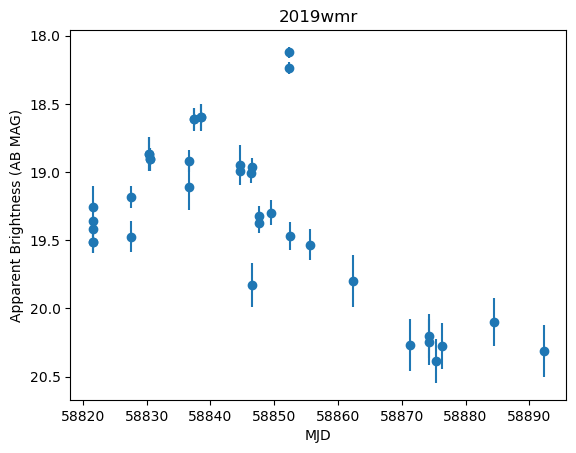

In [65]:
wmr = import_snana('2019wmr_YSEdata.snana.txt')
upperlim = wmr['MAGERR'] < .2
mask = wmr['MAGERR'] >= 0 
mask = mask & upperlim
plt.errorbar(wmr[mask]['MJD'], wmr[mask]['MAG'], yerr = wmr[mask]['MAGERR'], fmt='o')
plt.gca().invert_yaxis()
plt.title('2019wmr')
plt.xlabel('MJD')
plt.ylabel('Apparent Brightness (AB MAG)')

Text(0, 0.5, 'Apparent Brightness (AB MAG)')

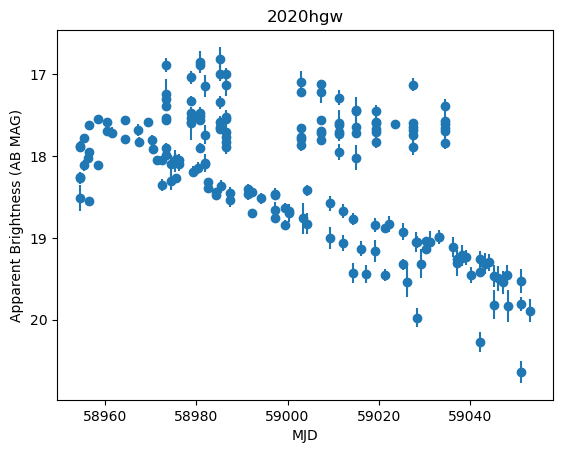

In [66]:
hgw = import_snana('2020hgw_YSEdata.snana.txt')
upperlim = hgw['MAGERR'] < .2
mask = hgw['MAGERR'] >= 0 
mask = mask & upperlim
plt.errorbar(hgw[mask]['MJD'], hgw[mask]['MAG'], yerr = hgw[mask]['MAGERR'], fmt='o')
plt.gca().invert_yaxis()
plt.title('2020hgw')
plt.xlabel('MJD')
plt.ylabel('Apparent Brightness (AB MAG)')

Text(0, 0.5, 'Apparent Brightness (AB MAG)')

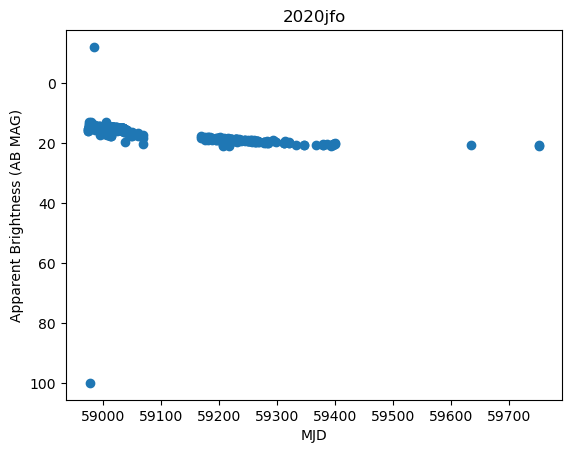

In [67]:
jfo = import_snana('2020jfo_YSEdata.snana.txt')
upperlim = jfo['MAGERR'] < .2
mask = jfo['MAGERR'] >= 0 
mask = mask & upperlim
plt.errorbar(jfo[mask]['MJD'], jfo[mask]['MAG'], yerr = jfo[mask]['MAGERR'], fmt='o')
plt.gca().invert_yaxis()
plt.title('2020jfo')
plt.xlabel('MJD')
plt.ylabel('Apparent Brightness (AB MAG)')

Text(0, 0.5, 'Apparent Brightness (AB MAG)')

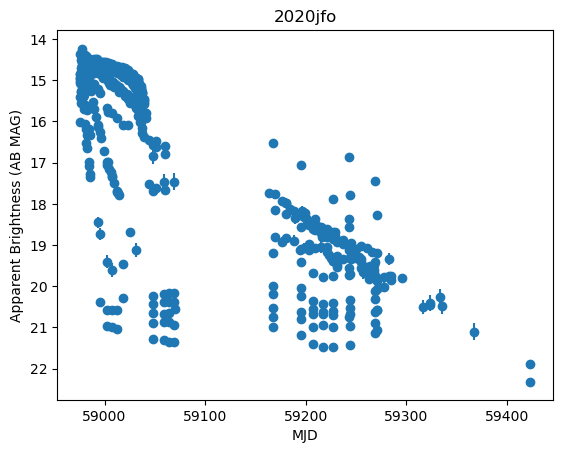

In [68]:
jfo = Table.read('2020jfo_lightcurves', format = 'ascii')
upperlim = jfo['MAGERR'] < .2
mask = jfo['MAGERR'] >= 0 
mask = mask & upperlim
plt.errorbar(jfo[mask]['MJD'], jfo[mask]['MAG'], yerr = jfo[mask]['MAGERR'], fmt='o')
plt.gca().invert_yaxis()
plt.title('2020jfo')
plt.xlabel('MJD')
plt.ylabel('Apparent Brightness (AB MAG)')

Text(0, 0.5, 'Apparent Brightness (AB MAG)')

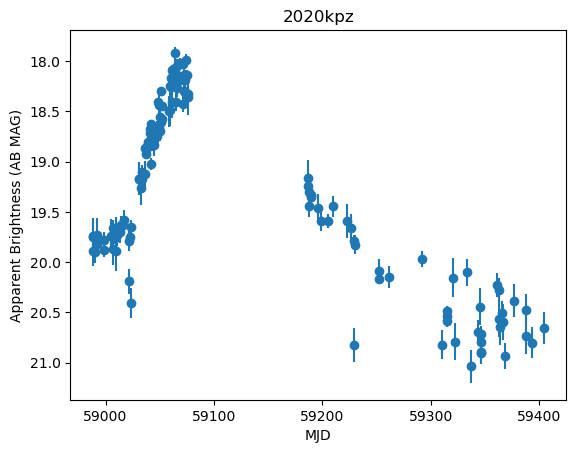

In [69]:
kpz = import_snana('2020kpz_YSEdata.snana.txt')
upperlim = kpz['MAGERR'] < .2
mask = kpz['MAGERR'] >= 0 
mask = mask & upperlim
plt.errorbar(kpz[mask]['MJD'], kpz[mask]['MAG'], yerr = kpz[mask]['MAGERR'], fmt='o')
plt.gca().invert_yaxis()
plt.title('2020kpz')
plt.xlabel('MJD')
plt.ylabel('Apparent Brightness (AB MAG)')

Text(0, 0.5, 'Apparent Brightness (AB MAG)')

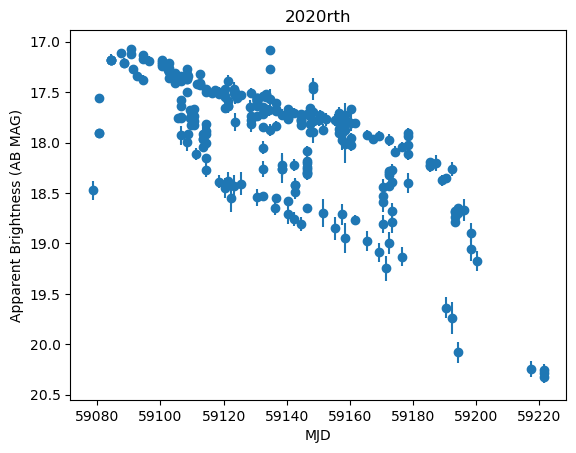

In [70]:
rth = import_snana('2020rth_YSEdata.snana.txt')
upperlim = rth['MAGERR'] < .2
mask = rth['MAGERR'] >= 0 
mask = mask & upperlim
plt.errorbar(rth[mask]['MJD'], rth[mask]['MAG'], yerr = rth[mask]['MAGERR'], fmt='o')
plt.gca().invert_yaxis()
plt.title('2020rth')
plt.xlabel('MJD')
plt.ylabel('Apparent Brightness (AB MAG)')

Text(0, 0.5, 'Apparent Brightness (AB MAG)')

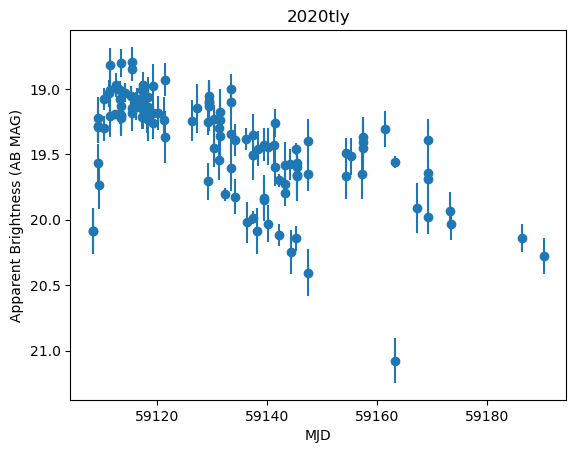

In [71]:
tly = import_snana('2020tly_YSEdata.snana.txt')
upperlim = tly['MAGERR'] < .2
mask = tly['MAGERR'] >= 0 
mask = mask & upperlim
plt.errorbar(tly[mask]['MJD'], tly[mask]['MAG'], yerr = tly[mask]['MAGERR'], fmt='o')
plt.gca().invert_yaxis()
plt.title('2020tly')
plt.xlabel('MJD')
plt.ylabel('Apparent Brightness (AB MAG)')

In [72]:
dataset = vstack([wmr, hgw, jfo, kpz, rth, tly])
distinct_filters = set(dataset['FLT'])
distinct_filters

{'B',
 'B-N',
 'F555W',
 'F814W',
 'G',
 'U',
 'UVM2',
 'UVW1',
 'UVW2',
 'U_S',
 'V',
 'V-N',
 'cyan',
 'cyan-ATLAS',
 'g',
 'g-ZTF',
 'gp',
 'i',
 'i-N',
 'ip',
 'orange',
 'orange-ATLAS',
 'r',
 'r-N',
 'r-ZTF',
 'rp',
 'up',
 'w',
 'y',
 'z'}

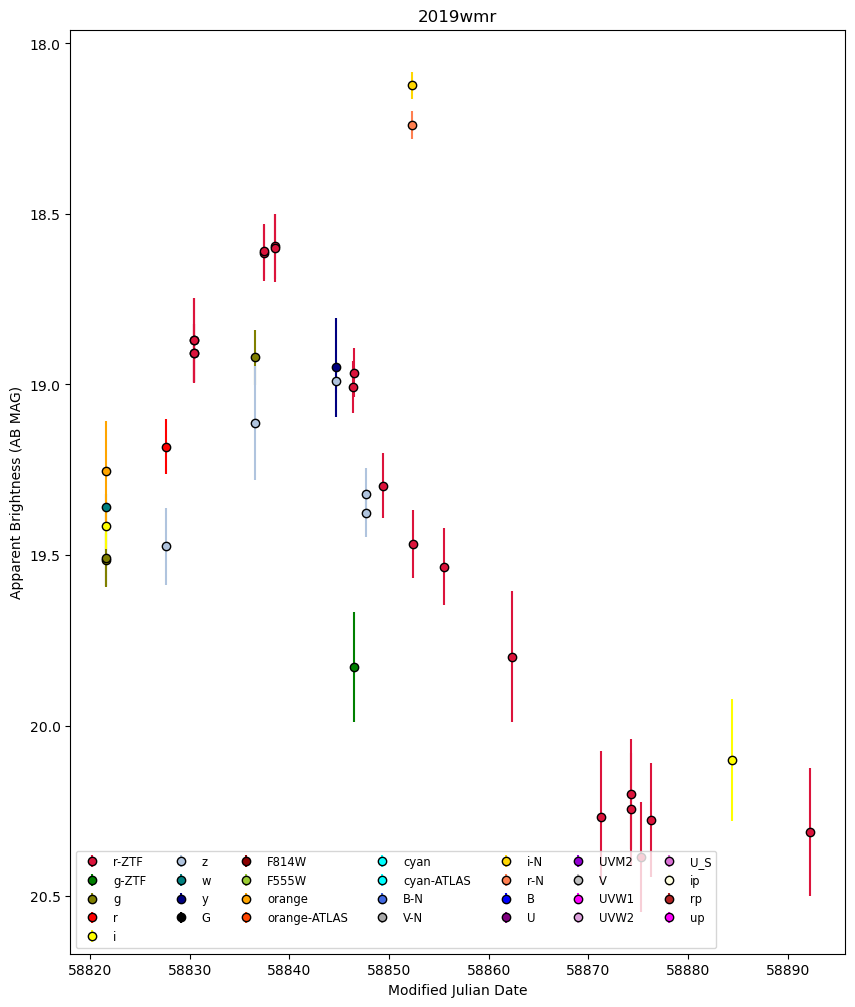

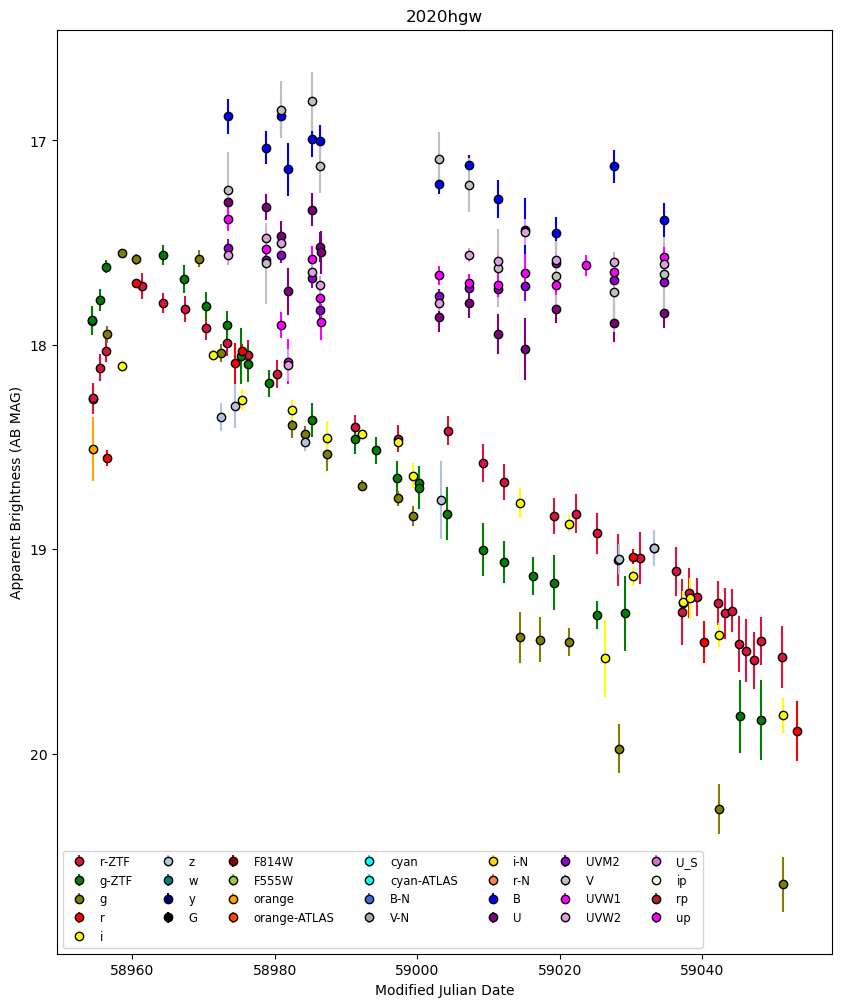

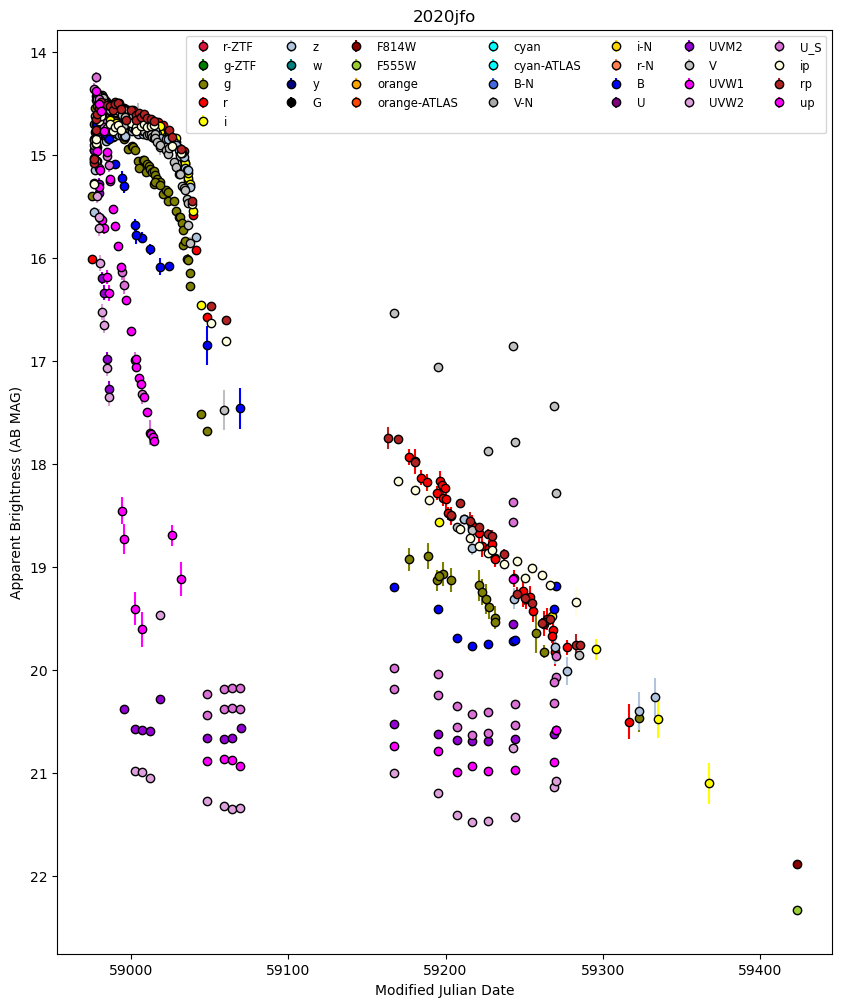

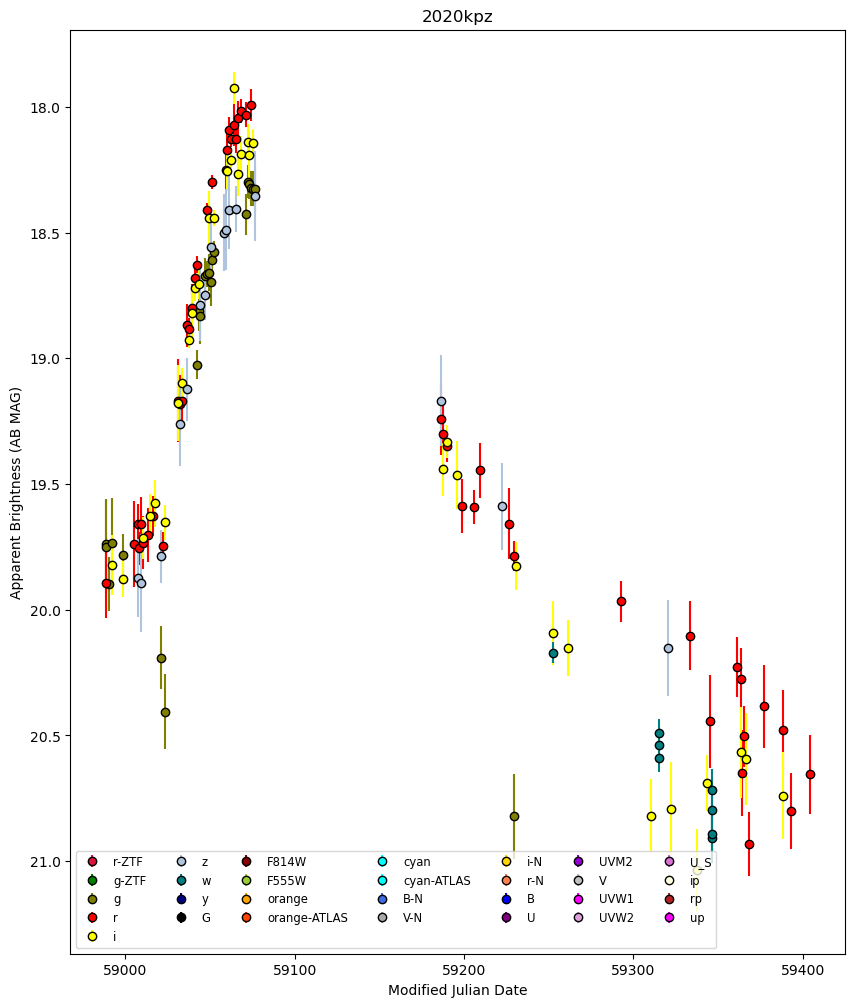

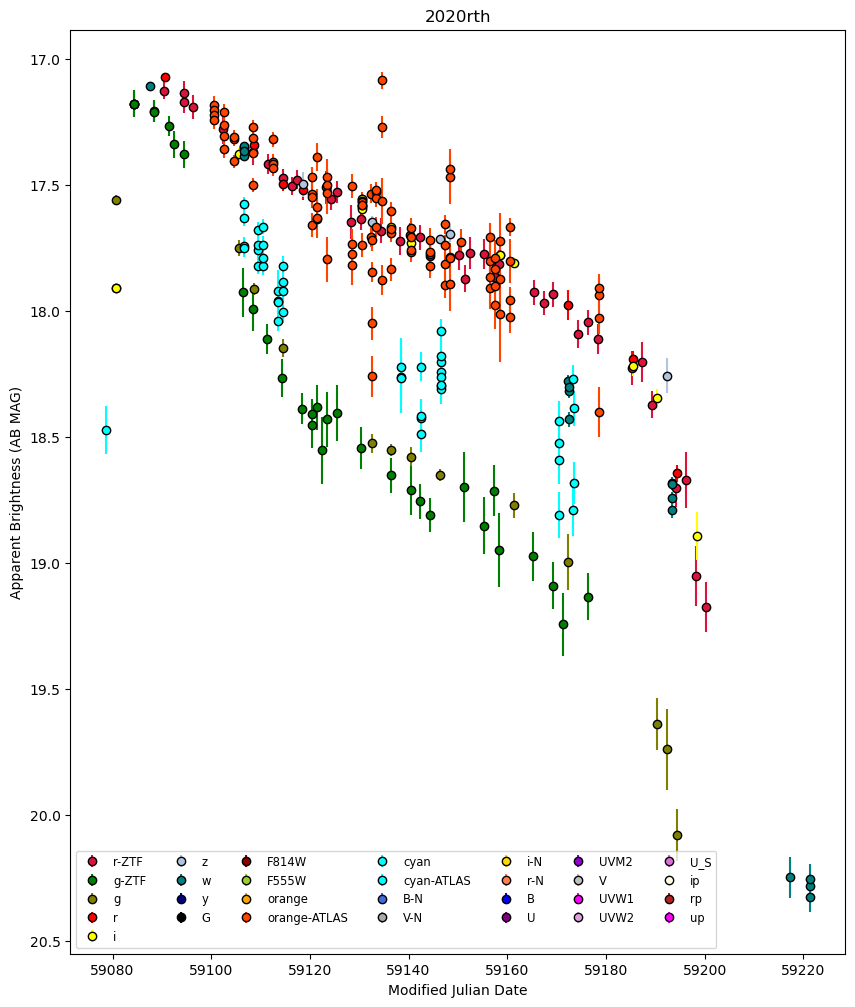

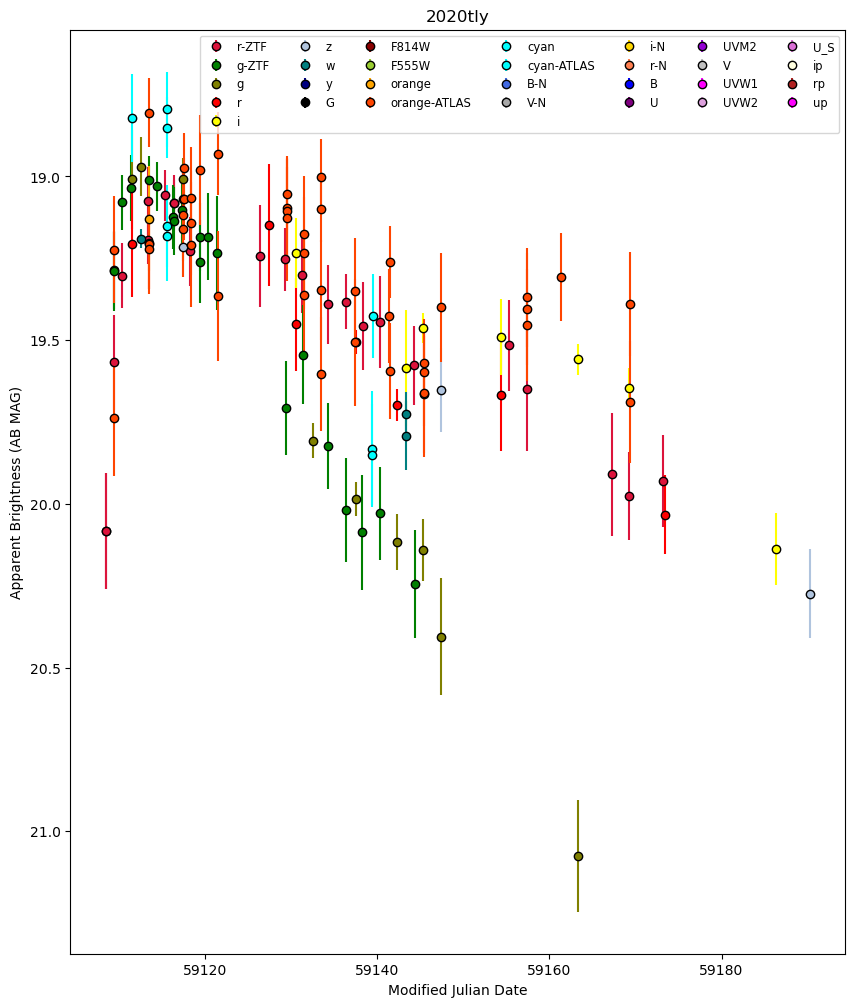

In [79]:
full_data_set = [wmr, hgw, jfo, kpz, rth, tly]
full_object_names = ['2019wmr', '2020hgw', '2020jfo', '2020kpz', '2020rth', '2020tly']
for idx, table in enumerate(full_data_set):
    plt.figure(idx)
    colors = {'B':'blue','B-N':'royalblue', 'F555W':'yellowgreen', 'F814W': 'darkred', 'G':'black', 'U': 'purple', 'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
         'V-N':'darkgrey','cyan':'cyan', 'cyan-ATLAS':'aqua', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold','ip':'lightyellow', 'orange':'orange', 'orange-ATLAS':'orangered', 
         'r':'red', 'r-N':'coral','r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 'w':'teal', 'y':'navy', 'z':'lightsteelblue' }
    PAN = {}
    ZTF = {}
    ATLAS = {}
    HST = {}
    GAIA = {}
    NICKEL = {}
    SWOPE = {}
    SWIFT = {}
    plt.rcParams['figure.figsize'] = (10,12)  
    for i, filt in enumerate(['r-ZTF', 'g-ZTF']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ZTF[filt] = l
    for i, filt in enumerate(['g', 'r', 'i', 'z', 'w', 'y']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        PAN[filt] = l
    for i, filt in enumerate(['G']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        GAIA[filt] = l
    for i, filt in enumerate(['F814W', 'F555W']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        HST[filt] = l
    for i, filt in enumerate(['orange', 'orange-ATLAS', 'cyan', 'cyan-ATLAS']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ATLAS[filt] = l
    for i, filt in enumerate(['B-N','V-N', 'i-N', 'r-N']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        NICKEL[filt] = l
    for i, filt in enumerate(['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWIFT[filt] = l
    for i, filt in enumerate(['ip', 'rp', 'up']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0 
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWOPE[filt] = l
    plt.gca().invert_yaxis()
    plt.title(full_object_names[idx])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Apparent Brightness (AB MAG)')
    plt.legend(ncol = 7, fontsize = 'smaller')
    


    